In [11]:
# 08_wine.csv 데이터 불러들인 후 정보 확인하기 
import pandas as pd 
import numpy as np

wine = pd.read_csv("./data/08_wine.csv")
wine.info()
wine.head()

# alcohol : 알콜 도수 
# sugar : 당도 
# PH : 수소이온 농도 
# class : 와인종류 ( 0= 레드 , 1 = 화이트 )
# -> 알콜도수, 당도, 수소이온 농도를 가지고 와인종류를 구분하는 것 
# => 이진 분류 (레드 화이트 중에 선택)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


# 상관관계 분석 

In [12]:
# 상관관계 확인하기 : 표시된 값들을 상관계수라고 한다 
# 상관계수는 -1에서 1 사이값으로 표현된다 
# 음수 : 음의 상관관계 (우하향) 반비례 
# 양수 : 양의 상관관계 (우상향) 정비례
# 상관계수의 갑이 1에 가까울 수록 관계가 깊다라고 할 수 있다 
# 종속변수의 특성과 독립변수들간의 관계를 확인 할때 사용 
# 초반에 종속변수에 영향을 많이 미칠것으로 예상되는 특성들을 확인 할 수 있다 
# 확인 방법 : 왼쪽 위에서 오른쪽 아래로 중앙 대각선을 기준으로 왼편 또는 오른편 확인 
# 0보다 크면 영향이 있다고 본다 
# 데이터는 절대값으로 확인한다 

wine.corr()
# 우하향 데이터를 가지고 있음 
# class 와 가장 상관관계가 높은 것 -> sugar 
# 훈련 후 정확도가 떨어지면 상관관계 확인 후 낮은 것을 뺄 수 있다. 

,alcohol,sugar,pH,class
alcohol,1.000000,-0.359415,0.121248,0.032970
sugar,-0.359415,1.000000,-0.267320,0.348821
pH,0.121248,-0.267320,1.000000,-0.329129
class,0.032970,0.348821,-0.329129,1.000000


In [13]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [20]:
# 독립변수와 종속변수 분리하기 
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

print(target.shape, data.shape)

(6497,) (6497, 3)


In [21]:
# 분리시키기 
from sklearn.model_selection import train_test_split
train_input, test_input,train_target, test_target = train_test_split(data, target, test_size = 0.2, random_state = 42)
print(train_input.shape, train_target.shape)
print (test_input.shape, test_target.shape)

(5197, 3) (5197,)
(1300, 3) (1300,)


In [23]:
# 정규화 하기 
from sklearn.preprocessing import StandardScaler

#함수 불러오기 
ss = StandardScaler()

# 스스로 표준 점수 생성
ss.fit(train_input)

#훈련데이터를 표준 점수로 변환하기 
train_scaled = ss.transform(train_input)

#테스트데이터를 표준점수로 변환하기 
test_scaled = ss.transform(test_input)

print(train_scaled.shape, test_scaled.shape)

(5197, 3) (1300, 3)


In [25]:
# 로지스틱회귀 모델로 분류하기 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


## 결정 트리 (Decision Tree,DT) 모델 사용

- 질문(조건)을 스스로 만들어 가면서 트리 2개씩으로 가지를 치면서 분류한다고 해서 트리 
- 질문을 스스로 찾아서 계속해서 질문(조건)을 만들어 나가는 분류모델 
- 더이상 질문이 업으면 결정(Decision)한다고 해서 결정트리 라고 한다 
- 분류정확도가 높으며 전체 트리절차를 시각화 할 수 있는 장점이 있다 
- 시각화 함수 : 사이킷런의 plot_tree() 함수를 사용 (tree의 사각화가 가능)
- 상대적으로 정확도가 높은 편이다 
- 다양한 트리구조가 새로 나오면서 기초적인 모델로 자리 잡음

In [27]:
# 라이브러리 불러들이기 
# 회귀와 분류 모두 가능한 모델이다 
from sklearn.tree import DecisionTreeClassifier
# 모델생성하기 
dt = DecisionTreeClassifier(random_state= 42)
# 훈련시키기 
dt.fit(train_scaled, train_target)
# 훈련모델 분류정확도 확인하기
# - 과적합 여부 확인을 위해 훈련 및 테스트 데이터 모두 확인 
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

# (해석)
# 과대적합 발생 0.1 이상의 차이 
# 로지스틱보다 정확도가 높음 

0.996921300750433
0.8592307692307692


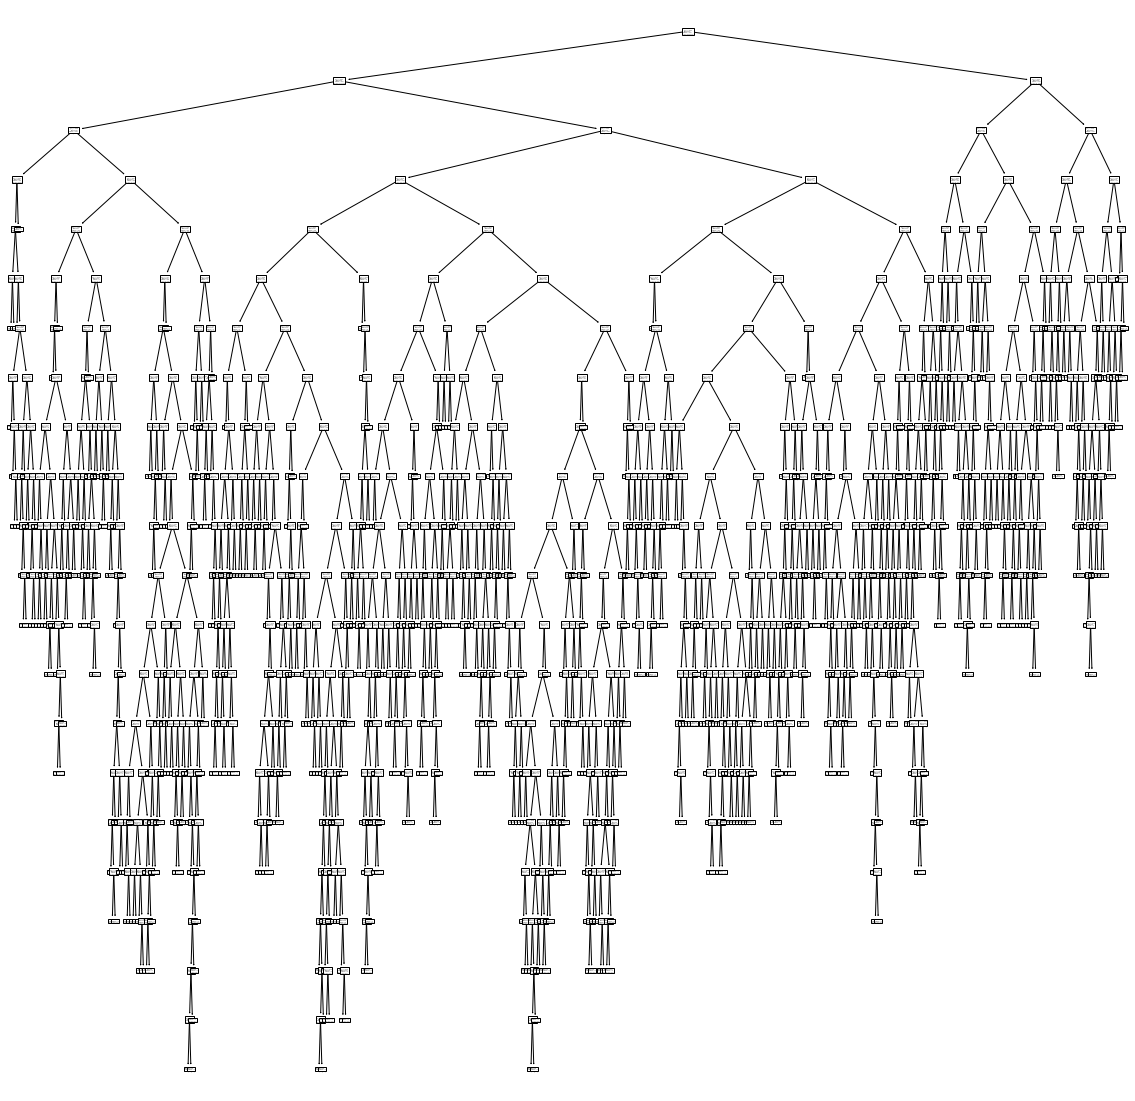

In [28]:
# 훈련 모델이 학습한 절차 시각화 하기 
import matplotlib.pyplot as plt 
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
plot_tree(dt)
plt.show()

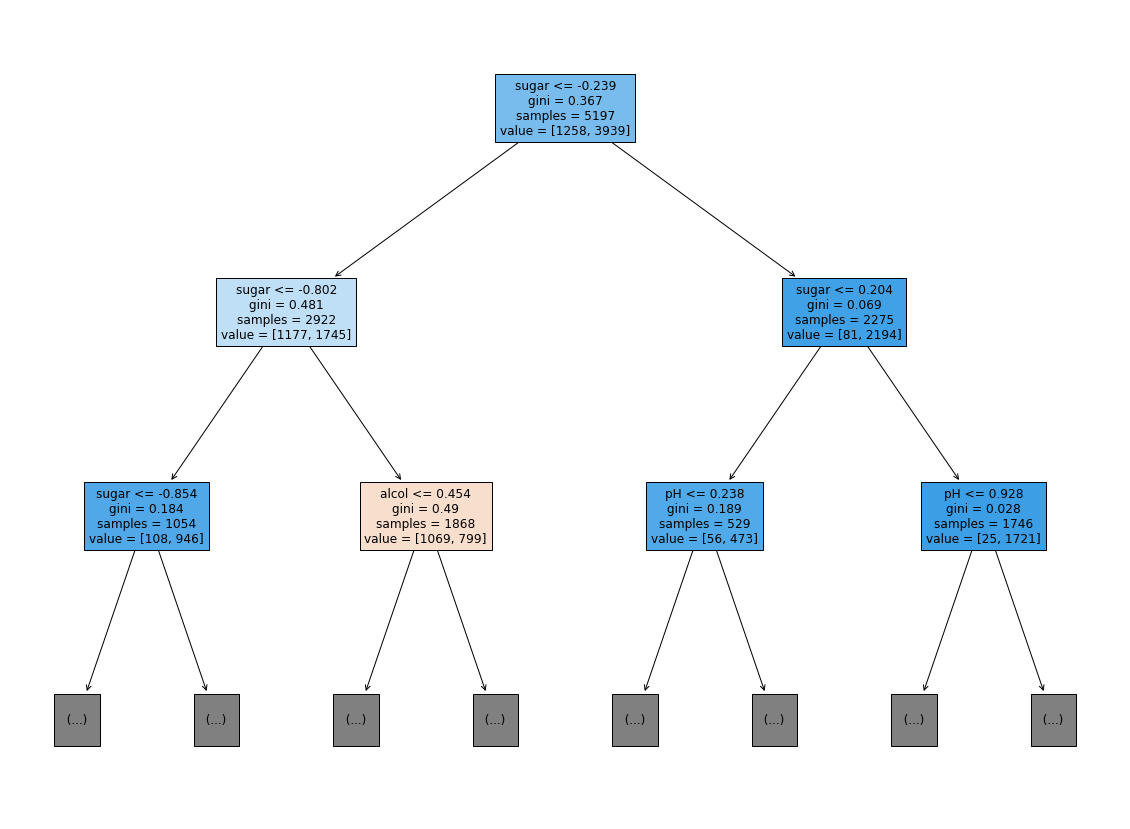

In [32]:
# 상위 트리만 확인해보기 
# max_depth : 트리의 깊이 저장 
#             : 루트(root- 가장상단) 노드를 제외하고의 깊이를 의미한다 
# filed : 트리가 구분되면서 범주(freature_names) 별로 색으로 구분
plt.figure(figsize=(20,15))
plot_tree(dt,max_depth=2, filled=True, feature_names=['alcol', 'sugar', 'pH'])
plt.show()
# 트리의 첫번째 값은 : 조건 
# - gini : 불순도(0에 가까울 수록 정확도가 높아진다는 의미)
#       : 불순도가 최대한 낮아질때 까지 뻣어 나간다 
# - samples : 테스트에 사용된 총 데이터 개수 
# - value : 번주(특성)별로 테스트에 사용한 데이터 개수 
# 왼쪽이 0 오른쪽이 1
# 가장 위에 있는 노드 : root 노드 (root node)
# 가장 하단에 있는 노드(최종 결정된 노드) : 리프노드 (leaf node)

## 가지치기 : 트리의 깊이 (개수 : max_depth) 제한

In [34]:
# 모델생성하기 
dt = DecisionTreeClassifier(max_depth=3, random_state= 42)
# 훈련시키기 
dt.fit(train_scaled, train_target)
# 분류정확도 확인하기 
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


## 특성 중요도(feature importances)

In [37]:
# - 어떤 특성(퓨터, feature)이 가장 유용한지 확인 
print(dt.feature_importances_)
#결과 순서 : alcohol, sugar, pH
# -> 상관관계에서는 alcohol이 너 낮았음 but 지금은 pH가 더 낮다 
# pH는 빼고 진행해도 된다 

[0.12345626 0.86862934 0.0079144 ]


## 특성공학 : 특성을 줄여서 정확도 확인하기 

In [41]:
data = wine[["alcohol",'sugar']].to_numpy()
target = wine['class'].to_numpy()

#훈련 및 테스트 데이터 문리 
train_input, test_input,train_target, test_target = train_test_split(data, target, test_size = 0.2, random_state = 42)
print(train_input.shape, train_target.shape)
print (test_input.shape, test_target.shape)

#정규화 (표준화)하기 
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

print(train_scaled.shape, test_scaled.shape)

(5197, 2) (5197,)
(1300, 2) (1300,)
(5197, 2) (1300, 2)


In [42]:
dt = DecisionTreeClassifier(max_depth=3, random_state= 42)
# 훈련시키기 
dt.fit(train_scaled, train_target)
# 분류정확도 확인하기 
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616
